In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import pandas as pd

# 재무재표 데이터 분석

In [ ]:
# 재무재표 데이터 불러오기
finance = pd.read_csv('/22 7 13/재무재표샘플데이터.csv')

## 기초분석

[정리]
- 19408 X 15

- 특성 :  
['기업', '연도', '부채비율', '매출액증가율', '영업이익증가율', '당기순이익증가율', '매출액_상태', '영업이익_상태', '당기순이익_상태', 'ROA', 'ROE', '현재_주가', '미래_주가', '배당금', 'PER' ]

- 분석 대상 기업 수: 2352
- 분석 기간: 2013 ~ 2020
- '연도'와 '기업' 자료에는 결측치 없음! ( 모든 기업은 2013 ~ 2016 사이의 데이터를 가지고 있다.)


In [ ]:
finance.shape

(19408, 15)

In [ ]:
finance.columns

Index(['기업', '연도', '부채비율', '매출액증가율', '영업이익증가율', '당기순이익증가율', '매출액_상태',
       '영업이익_상태', '당기순이익_상태', 'ROA', 'ROE', '현재_주가', '미래_주가', '배당금', 'PER'],
      dtype='object')

In [ ]:
finance.head()

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER
0,3S,2013,70.612320,NaN,NaN,NaN,적자전환,적자전환,적자전환,1.036271,NaN,6100.0,4350.0,NaN,NaN
1,3S,2014,60.288336,-11.687845,173.179128,114.728018,흑자지속,적자전환,적자전환,-6.675781,-10.489496,4350.0,2535.0,NaN,NaN
2,3S,2015,56.323967,-24.352916,38.894997,14.974005,흑자지속,적자지속,적자지속,-8.312107,-13.836280,2535.0,3595.0,NaN,NaN
3,3S,2016,59.923676,2.240210,453.409466,-64.511098,흑자지속,흑자전환,적자지속,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253
4,3S,2017,54.331315,10.359573,148.592592,61.341308,흑자지속,적자전환,적자지속,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619


In [ ]:
finance.tail()

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER
19403,힘스,2016,45.998444,NaN,NaN,NaN,NaN,NaN,NaN,10.213367,NaN,16530.0,8115.0,0.0,10.726801
19404,힘스,2017,72.028464,NaN,57.915341,59.139944,NaN,흑자지속,흑자지속,16.722845,32.533952,8115.0,7438.0,200.0,3.093786
19405,힘스,2018,80.625862,NaN,1014.435660,1285.956550,NaN,적자전환,적자전환,-1.567183,-1.950691,7438.0,7488.0,0.0,38.739583
19406,힘스,2019,70.065289,NaN,122.184183,112.102500,NaN,흑자전환,흑자전환,9.732740,14.897331,7488.0,13400.0,200.0,9.957447
19407,힘스,2020,85.556186,NaN,69.152237,50.930528,NaN,흑자지속,흑자지속,18.934010,24.841243,13400.0,NaN,150.0,8.804205


In [ ]:
finance.describe()

,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,ROA,ROE,현재_주가,미래_주가,배당금,PER
count,19408.000000,15575.000000,13276.000000,13486.000000,13383.000000,15467.000000,13391.000000,1.793600e+04,1.575800e+04,13800.000000,12994.000000
mean,2016.545754,57.192991,-13.714507,5.663680,15.950976,-0.251890,-1.786861,2.188167e+04,2.170006e+04,291.860870,59.039385
std,2.270829,25.675239,974.627140,3912.655608,3151.378894,19.553647,103.299383,6.410857e+04,6.273922e+04,1409.908478,437.410113
min,2013.000000,-690.981106,-109930.000100,-376694.348500,-206191.046200,-685.047986,-6234.108558,9.600000e+01,1.080000e+02,0.000000,0.007537
25%,2015.000000,41.922336,-7.787340,-23.025541,-24.660531,-1.692919,-3.624691,2.990000e+03,3.000000e+03,0.000000,7.397497
50%,2017.000000,57.965976,2.900938,15.989388,25.121183,2.263272,4.106012,6.777000e+03,6.770000e+03,20.000000,14.770284
75%,2018.000000,75.189708,13.522463,68.099875,89.798188,5.947898,10.153421,1.700000e+04,1.696200e+04,170.000000,32.129018
max,2020.000000,100.000000,100.000000,111606.989200,104804.574900,407.621432,5452.195323,1.614000e+06,1.614000e+06,100000.000000,29780.000000


In [ ]:
finance.isna().sum()

기업             0
연도             0
부채비율        3833
매출액증가율      6132
영업이익증가율     5922
당기순이익증가율    6025
매출액_상태      4494
영업이익_상태     4299
당기순이익_상태    4408
ROA         3941
ROE         6017
현재_주가       1472
미래_주가       3650
배당금         5608
PER         6414
dtype: int64

In [ ]:
len(finance['기업'].unique())

2352

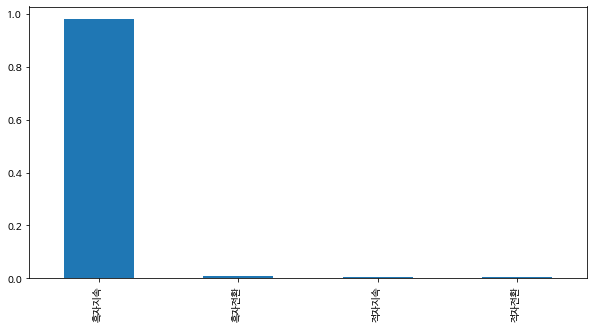

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.figure(figsize=(10, 5))
finance['매출액_상태'].value_counts(normalize=True).plot(kind='bar');

In [ ]:
numberic_col = ['부채비율','매출액증가율','영업이익증가율','당기순이익증가율','ROA','ROE','현재_주가','미래_주가','배당금', 'PER'] # '연도' 제외
categorical_col = ['매출액_상태', '영업이익_상태', '당기순이익_상태'] # '기업'은 제외

In [ ]:
def best_worst(df,year):
  print(f'[{year}] 년도\n')
  tmp_df = df[df['연도']==year]

  for col in numberic_col:
    maxs = tmp_df.iloc[tmp_df[col].argmax()]
    coperation = maxs.기업
    print(f'\t [{col}] 이(가) 가장 높은 기업은 [{coperation}] 입니다.')

    mins = tmp_df.iloc[tmp_df[col].argmin()]
    coperation = mins.기업
    print(f'\t [{col}] 이(가) 가장 낮은 기업은 [{coperation}] 입니다.')
    print()
  print()

In [ ]:
for year in range(2013,2021):
  best_worst(finance,year)

[2013] 년도

	 [부채비율] 이(가) 가장 높은 기업은 [하이골드12호] 입니다.
	 [부채비율] 이(가) 가장 낮은 기업은 [큐리언트] 입니다.

	 [매출액증가율] 이(가) 가장 높은 기업은 [힘스] 입니다.
	 [매출액증가율] 이(가) 가장 낮은 기업은 [힘스] 입니다.

	 [영업이익증가율] 이(가) 가장 높은 기업은 [힘스] 입니다.
	 [영업이익증가율] 이(가) 가장 낮은 기업은 [힘스] 입니다.

	 [당기순이익증가율] 이(가) 가장 높은 기업은 [힘스] 입니다.
	 [당기순이익증가율] 이(가) 가장 낮은 기업은 [힘스] 입니다.

	 [ROA] 이(가) 가장 높은 기업은 [종근당홀딩스] 입니다.
	 [ROA] 이(가) 가장 낮은 기업은 [오성첨단소재] 입니다.

	 [ROE] 이(가) 가장 높은 기업은 [힘스] 입니다.
	 [ROE] 이(가) 가장 낮은 기업은 [힘스] 입니다.

	 [현재_주가] 이(가) 가장 높은 기업은 [태광산업] 입니다.
	 [현재_주가] 이(가) 가장 낮은 기업은 [서울식품] 입니다.

	 [미래_주가] 이(가) 가장 높은 기업은 [영풍] 입니다.
	 [미래_주가] 이(가) 가장 낮은 기업은 [서울식품] 입니다.

	 [배당금] 이(가) 가장 높은 기업은 [한국쉘석유] 입니다.
	 [배당금] 이(가) 가장 낮은 기업은 [AJ네트웍스] 입니다.

	 [PER] 이(가) 가장 높은 기업은 [코미팜] 입니다.
	 [PER] 이(가) 가장 낮은 기업은 [팬오션] 입니다.


[2014] 년도

	 [부채비율] 이(가) 가장 높은 기업은 [하이골드12호] 입니다.
	 [부채비율] 이(가) 가장 낮은 기업은 [큐리언트] 입니다.

	 [매출액증가율] 이(가) 가장 높은 기업은 [SGA솔루션즈] 입니다.
	 [매출액증가율] 이(가) 가장 낮은 기업은 [심텍홀딩스] 입니다.

	 [영업이익증가율] 이(가) 가장 높은 기업은 [성안] 입니다.
	 [영업이익증가율] 이(가) 가장 낮은 기업은 [아이에스이커머스] 입니다.

	 [당기

## 결측치 처리

### - 수치형 변수 결측치 처리

- 기업 별로 나누어, 선형으로 비례하도록 보간
- 단, 어떤 수치형 컬럼에 대한 데이터가 전혀 없어 증감율을 반영할 수 없는 경우,
당해 모든 회사들의 평균 값으로 대체

In [ ]:
def replace_missing_num_val(df):
  df_col_origin = df.columns

  # 1. 수치형 column 과 범주형 column 으로 df 나누기 
  df_numberic = df[numberic_col]  
  df_catgorical = df[df.columns.difference(numberic_col)]

  # 2. 수치형 column 결측치 보간
  df_numberic = df_numberic.interpolate()
  df_numberic = df_numberic.interpolate(limit_direction='backward')

  # 3. 나눠진 df를 합치고, column 순서 원상복구
  df = pd.concat([df_catgorical,df_numberic],axis = 1)
  df = df[df_col_origin]
  
  return df

for corper in finance['기업'].unique():
  idx = finance[finance['기업']==corper].index
  target_df = finance.loc[idx,:].copy()
  finance.loc[idx,:] = replace_missing_num_val(target_df)

In [ ]:
finance.isna().sum()

기업             0
연도             0
부채비율        1593
매출액증가율      1804
영업이익증가율     1602
당기순이익증가율    1646
매출액_상태      4494
영업이익_상태     4299
당기순이익_상태    4408
ROA         1646
ROE         1655
현재_주가       1472
미래_주가       1472
배당금         3525
PER         4609
dtype: int64

In [ ]:
for col in numberic_col:
  mean_arr = list(finance.groupby('연도')[col].mean())
  for i in range(8):
    year = i + 2013
    target_df = finance[finance['연도']==year].copy()
    target_df.loc[target_df[col] != target_df[col], col] = mean_arr[i]
    finance.loc[finance['연도']==year] = target_df

In [ ]:
finance.isna().sum()

기업             0
연도             0
부채비율           0
매출액증가율         0
영업이익증가율        0
당기순이익증가율       0
매출액_상태      4494
영업이익_상태     4299
당기순이익_상태    4408
ROA            0
ROE            0
현재_주가          0
미래_주가          0
배당금            0
PER            0
dtype: int64

### 범주형 변수 결측치 처리

In [ ]:
def replace_missing_cate_val(df):
  # 범주형 칼럼의 값을 추출하여 현재 행의 값이 na이고 다음 행의 값이 있을 때, 현재 행의 값을 유추한다.
  for col in categorical_col:
    if True not in list(df[col].isna()): # 해당 컬럼에 결측값이 하나도 없다면 다음컬럼으로 넘어감
      continue
    else:
      val_arr = list(df[col])     # ex) ['적자유지','흑자전환','흑자유지',nan,nan,'적자유지',nan,'흑자전환']
      new_val_arr = ['' for _ in range(len(val_arr))]
      for i in range(len(val_arr)-1):
        if (pd.isna(val_arr[i])) & (val_arr[i+1] == '흑자지속' or val_arr[i+1] == '적자전환'):
          new_val_arr[i]='흑자'
        elif (pd.isna(val_arr[i])) & (val_arr[i+1] == '적자지속' or val_arr[i+1] == '흑자전환'):
          new_val_arr[i]='적자'
        else:
          new_val_arr[i]=val_arr[i]
      new_val_arr[-1]=val_arr[-1]
      df[col] = new_val_arr

  # ('흑자지속','흑자전환') -> '흑자' , ('적자지속','적자전환') -> '적자'
  for col in categorical_col:
    idx = df[df[col].apply(str).str.contains('흑자',na=False)].index
    df.loc[idx,col] = '적자'
    idx = df[df[col].apply(str).str.contains('적자',na=False)].index
    df.loc[idx,col] = '적자'

  # 나머지 결측값은 '흑자'로 채움
  df.fillna('흑자',inplace=True)


  return df

for corper in finance['기업'].unique():
  idx = finance[finance['기업']==corper].index
  target_df = finance.loc[idx,:].copy()
  finance.loc[idx,:] = replace_missing_cate_val(target_df)

In [ ]:
finance.isna().sum()

기업          0
연도          0
부채비율        0
매출액증가율      0
영업이익증가율     0
당기순이익증가율    0
매출액_상태      0
영업이익_상태     0
당기순이익_상태    0
ROA         0
ROE         0
현재_주가       0
미래_주가       0
배당금         0
PER         0
dtype: int64

## 새로운 변수 선언

(* 출처: https://ko.wikipedia.org/wiki/%EC%9E%90%EA%B8%B0%EC%9E%90%EB%B3%B8%EC%9D%B4%EC%9D%B5%EB%A5%A0)


ROE = PBR / PER
  - PBR =  ROE * PER

PBR = 현재주가 / 주당순자산 (BPS)
  - BPS = 현재주가 / PBR

PER = 현재주가 / 주당순이익 (EPS)
  - EPS = 현재주가 / PER


In [ ]:
finance['PBR'] = finance['ROE'] * finance['PER']
finance['BPS'] = finance['현재_주가']/finance['PBR']
finance['EPS'] = finance['현재_주가']/finance['PER']

numberic_col += ['PBR','BPS','EPS']

In [ ]:
-10.489496 * 43.313253

-454.33419409048804

In [ ]:
finance

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,PBR,BPS,EPS
0,3S,2013,70.612320,-11.687845,173.179128,114.728018,적자,적자,적자,1.036271,-10.489496,6100.0,4350.0,0.0,43.313253,-454.334213,-13.426240,140.834492
1,3S,2014,60.288336,-11.687845,173.179128,114.728018,적자,적자,적자,-6.675781,-10.489496,4350.0,2535.0,0.0,43.313253,-454.334213,-9.574450,100.431154
2,3S,2015,56.323967,-24.352916,38.894997,14.974005,적자,적자,적자,-8.312107,-13.836280,2535.0,3595.0,0.0,43.313253,-599.294295,-4.229975,58.527121
3,3S,2016,59.923676,2.240210,453.409466,-64.511098,적자,적자,적자,-5.893767,-9.383155,3595.0,2320.0,0.0,43.313253,-406.414980,-8.845639,83.000000
4,3S,2017,54.331315,10.359573,148.592592,61.341308,적자,적자,적자,-16.392325,-27.605322,2320.0,2685.0,0.0,11.047619,-304.973081,-7.607229,210.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19403,힘스,2016,45.998444,-3.095342,57.915341,59.139944,흑자,적자,적자,10.213367,32.533952,16530.0,8115.0,0.0,10.726801,348.985227,47.365902,1541.000000
19404,힘스,2017,72.028464,4.965402,57.915341,59.139944,흑자,적자,적자,16.722845,32.533952,8115.0,7438.0,200.0,3.093786,100.653078,80.623466,2623.000000
19405,힘스,2018,80.625862,-42.017891,1014.435660,1285.956550,흑자,적자,적자,-1.567183,-1.950691,7438.0,7488.0,0.0,38.739583,-75.568962,-98.426653,192.000000
19406,힘스,2019,70.065289,-6.827465,122.184183,112.102500,흑자,적자,적자,9.732740,14.897331,7488.0,13400.0,200.0,9.957447,148.339378,50.478842,752.000000


## 시각화

In [ ]:
for year in range(2013,2021):
  best_worst(finance,year)

[2013] 년도
	 [부채비율] 이(가) 가장 높은 기업은 [ESR켄달스퀘어리츠] 입니다.
	 [부채비율] 이(가) 가장 낮은 기업은 [큐리언트] 입니다.

	 [매출액증가율] 이(가) 가장 높은 기업은 [AP시스템] 입니다.
	 [매출액증가율] 이(가) 가장 낮은 기업은 [심텍홀딩스] 입니다.

	 [영업이익증가율] 이(가) 가장 높은 기업은 [라닉스] 입니다.
	 [영업이익증가율] 이(가) 가장 낮은 기업은 [아이에스이커머스] 입니다.

	 [당기순이익증가율] 이(가) 가장 높은 기업은 [남양유업] 입니다.
	 [당기순이익증가율] 이(가) 가장 낮은 기업은 [스포츠서울] 입니다.

	 [ROA] 이(가) 가장 높은 기업은 [종근당홀딩스] 입니다.
	 [ROA] 이(가) 가장 낮은 기업은 [오성첨단소재] 입니다.

	 [ROE] 이(가) 가장 높은 기업은 [강스템바이오텍] 입니다.
	 [ROE] 이(가) 가장 낮은 기업은 [엔젠바이오] 입니다.

	 [현재_주가] 이(가) 가장 높은 기업은 [태광산업] 입니다.
	 [현재_주가] 이(가) 가장 낮은 기업은 [서울식품] 입니다.

	 [미래_주가] 이(가) 가장 높은 기업은 [영풍] 입니다.
	 [미래_주가] 이(가) 가장 낮은 기업은 [서울식품] 입니다.

	 [배당금] 이(가) 가장 높은 기업은 [푸드나무] 입니다.
	 [배당금] 이(가) 가장 낮은 기업은 [3S] 입니다.

	 [PER] 이(가) 가장 높은 기업은 [디와이디대양] 입니다.
	 [PER] 이(가) 가장 낮은 기업은 [바이오로그디바이스] 입니다.

	 [PBR] 이(가) 가장 높은 기업은 [디와이디대양] 입니다.
	 [PBR] 이(가) 가장 낮은 기업은 [휴먼엔] 입니다.

	 [BPS] 이(가) 가장 높은 기업은 [더블유게임즈] 입니다.
	 [BPS] 이(가) 가장 낮은 기업은 [GS건설] 입니다.

	 [EPS] 이(가) 가장 높은 기업은 [STX] 입니다.
	 [EPS] 이(가) 가장 낮은 기업은 [롯데손해보험] 입니다.


[2014

In [ ]:
def group_year_graph_mean(df):

  graph_df = df.groupby(['연도'],as_index = False)[numberic_col].mean() # 평균, ['yyyymmdd', 'area', 'sex', 'frequency'] 제외

  grid_col = 4
  grid_row = 4

  # 위쪽 margin을 20로 늘리고 수직 간격을 15로 늘립니다
  plt.subplots_adjust(top=40, hspace=20)
  # 아래쪽 margin을 15로 늘립니다
  plt.subplots_adjust(bottom=15)

  plt.figure(figsize=(20, 20))

  x = list(graph_df['연도'])
  for column,idx in zip(graph_df.columns[1:],range(len(graph_df.columns[1:]))):
    y = list(graph_df[column])
    plt.subplot(grid_row,grid_col,idx+1)
    plt.plot(x,y)
    plt.title(column)
  plt.show();

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


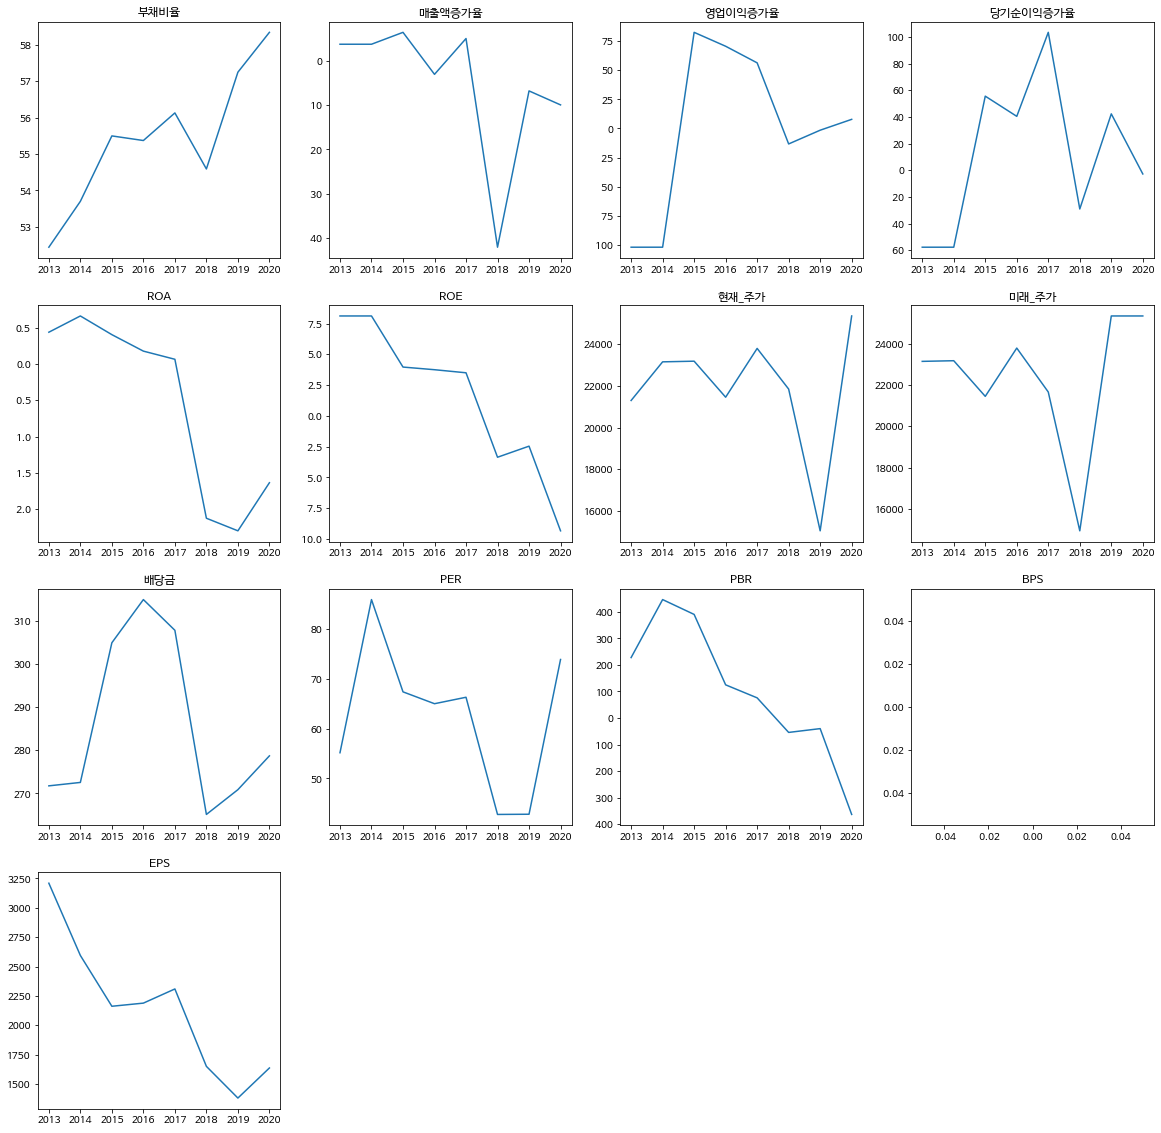

In [ ]:
group_year_graph_mean(finance)

In [ ]:
finance['BPS'].max()

inf

In [ ]:
finance[finance['PBR']==0]

,기업,연도,부채비율,매출액증가율,영업이익증가율,당기순이익증가율,매출액_상태,영업이익_상태,당기순이익_상태,ROA,ROE,현재_주가,미래_주가,배당금,PER,PBR,BPS,EPS
1168,NE능률,2016,76.827610,50.209692,53.889500,72.844905,적자,적자,적자,0.000000,0.0,6000.0,4120.0,70.000000,11.494253,0.0,inf,522.000000
1228,NICE,2018,47.860964,14.886504,52.233539,53.298497,흑자,적자,적자,0.000000,0.0,19800.0,18300.0,180.000000,12.344140,0.0,inf,1604.000000
1434,SGC에너지,2018,36.229876,38.489295,59.426439,123.684928,적자,적자,적자,-0.683388,0.0,39400.0,26250.0,750.000000,16.610455,0.0,inf,2372.000000
1900,YG PLUS,2018,78.706132,64.600726,472.283823,-248.935257,적자,적자,적자,0.000000,0.0,1930.0,949.0,0.000000,148.461538,0.0,inf,13.000000
3983,더블유게임즈,2013,73.420193,3.681302,100.000000,100.000000,적자,적자,적자,61.538848,0.0,62500.0,62500.0,0.000000,0.918456,0.0,inf,68048.999970
3984,더블유게임즈,2014,77.798615,3.681302,100.000000,100.000000,적자,적자,적자,44.742358,0.0,62500.0,34900.0,0.000000,0.382207,0.0,inf,163524.000076
4008,덕산네오룩스,2013,94.357415,100.000000,100.000000,100.000000,적자,적자,적자,0.000000,0.0,12825.0,11773.0,0.000000,69.882051,0.0,inf,183.523519
4009,덕산네오룩스,2014,94.357415,100.000000,100.000000,100.000000,적자,적자,적자,0.000000,0.0,11773.0,14729.0,0.000000,69.882051,0.0,inf,168.469582
4805,디젠스,2016,26.870228,67.895054,185.447900,261.208842,적자,적자,적자,0.000000,0.0,3485.0,1765.0,0.000000,32.877358,0.0,inf,106.000000
6016,미원홀딩스,2018,59.486148,0.000000,0.000000,-30.708923,적자,적자,적자,0.000000,0.0,38900.0,40650.0,400.000000,9.362214,0.0,inf,4155.000000


In [ ]:
def group_year_graph_median(df):

  graph_df = df.groupby(['연도'],as_index = False)[numberic_col].median() # 평균, ['yyyymmdd', 'area', 'sex', 'frequency'] 제외

  grid_col = 4
  grid_row = 4

  # 위쪽 margin을 20로 늘리고 수직 간격을 15로 늘립니다
  plt.subplots_adjust(top=40, hspace=20)
  # 아래쪽 margin을 15로 늘립니다
  plt.subplots_adjust(bottom=15)

  plt.figure(figsize=(20, 20))

  x = list(graph_df['연도'])
  for column,idx in zip(graph_df.columns[1:],range(len(graph_df.columns[1:]))):
    y = list(graph_df[column])
    plt.subplot(grid_row,grid_col,idx+1)
    plt.plot(x,y)
    plt.title(column)
  plt.show();

<Figure size 432x288 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


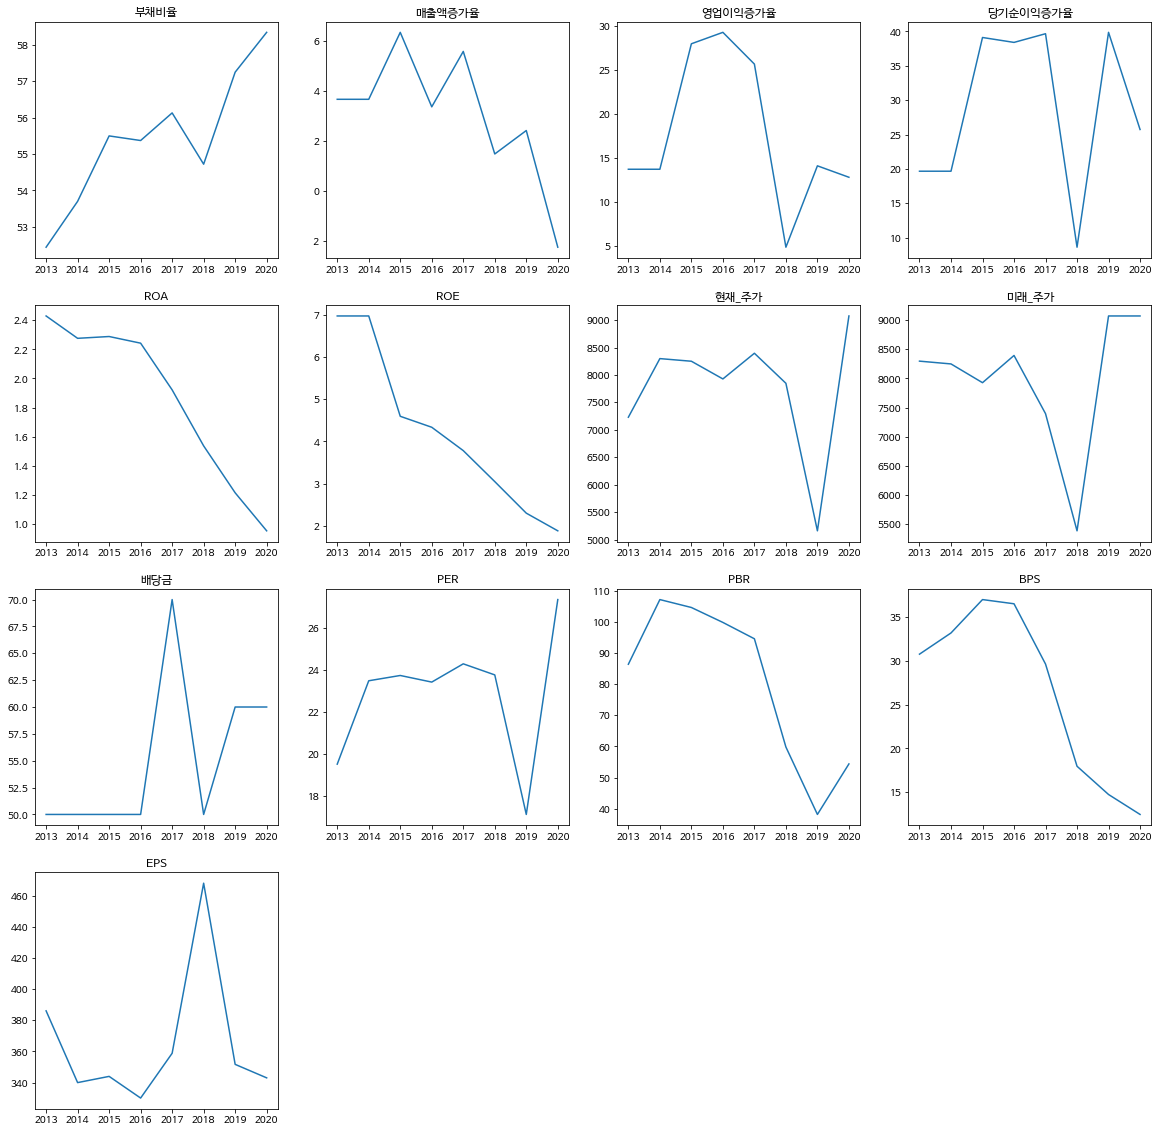

In [ ]:
group_year_graph_median(finance)